---
## Clustering <br> <font size=3.4> Dataset:crime_data.csv<br><font size=2>Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.<br> **Data Description:**<br>Murder -- Muder rates in different places of United States<br>Assualt -- Assualt rate in different places of United States<br>UrbanPop -- urban population in different places of United States<br>Rape -- Rape rate in different places of United States
---

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [2]:
df= pd.read_csv('/Users/Ketan/Data Science/Assignments/Clustering/crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
df1= df.rename({'Unnamed: 0':'City'},axis=1)

In [6]:
df1.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
df2 = df1.iloc[:,1:]

In [8]:
df2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
X = norm_func(df2.iloc[:,:])

## K-Means Clustering

### Checking via Elbow method for optimum number of clusters

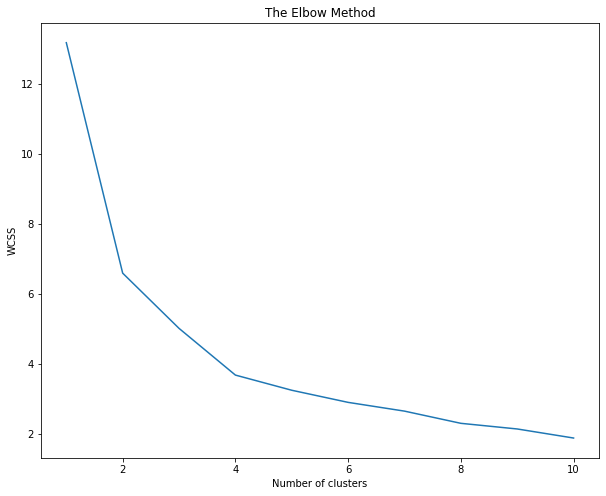

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Confirming the same with Silhouette score

In [13]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.32393600472652184
Silhouette score for k(clusters) = 4 is 0.3349095719865253
Silhouette score for k(clusters) = 5 is 0.3059874445304435
Silhouette score for k(clusters) = 6 is 0.2770330274448048
Silhouette score for k(clusters) = 7 is 0.28027043410177976
Silhouette score for k(clusters) = 8 is 0.23632290798603267
Silhouette score for k(clusters) = 9 is 0.24978676417318366
Silhouette score for k(clusters) = 10 is 0.23645447657533228
Silhouette score for k(clusters) = 11 is 0.24129077187129874
Silhouette score for k(clusters) = 12 is 0.23475944052143546


### Hence, we can conclude that optimum no of clusters = 4 

In [14]:
model=KMeans(n_clusters=4) 
model.fit(X)
model.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [15]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:5].groupby(df.kclust).mean()

,Murder,Assault,UrbanPop,Rape
kclust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

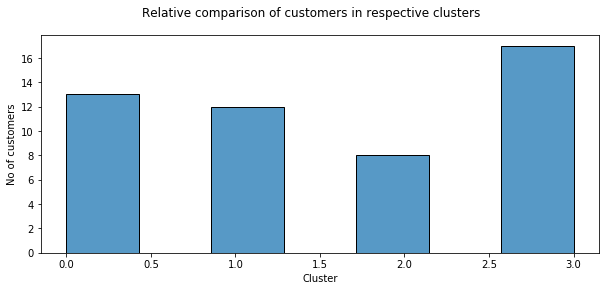

In [16]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

## Hierarchical Clustering

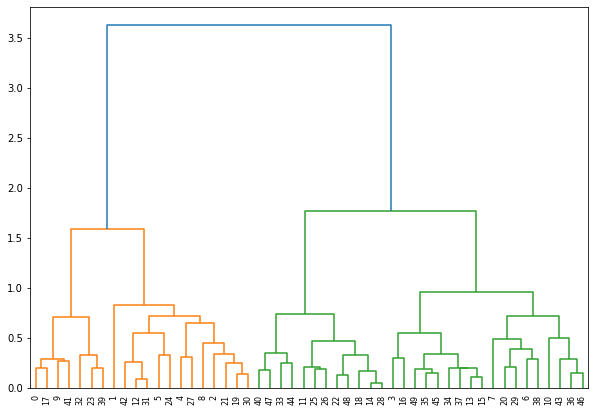

In [17]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

#### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 1.5 and cut the dendrogram:

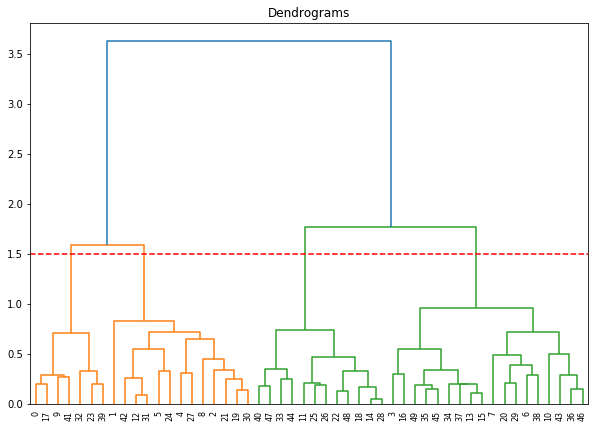

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

In [19]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [20]:
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [21]:
Clusters.value_counts()

Clusters
0           47
3            1
2            1
1            1
dtype: int64

In [ ]:
Clusters

In [23]:
df['hc_clust']= Clusters
df.iloc[:,1:7].groupby(df.hc_clust).mean()

,Murder,Assault,UrbanPop,Rape,kclust,hc_clust
hc_clust,,,,,,
0,7.619149,163.87234,65.468085,20.625532,1.574468,0
1,5.900000,238.00000,72.000000,15.800000,3.000000,1
2,15.400000,335.00000,80.000000,31.900000,1.000000,2
3,10.000000,263.00000,48.000000,44.500000,1.000000,3


Text(0.5, 0.98, 'Relative comparison of cities in respective clusters')

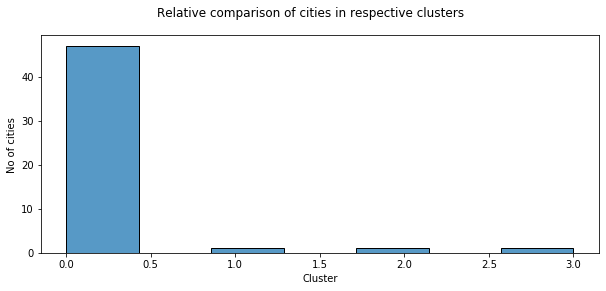

In [24]:
plt.figure(figsize=(10,4))
sns.histplot (x='hc_clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('Relative comparison of cities in respective clusters')

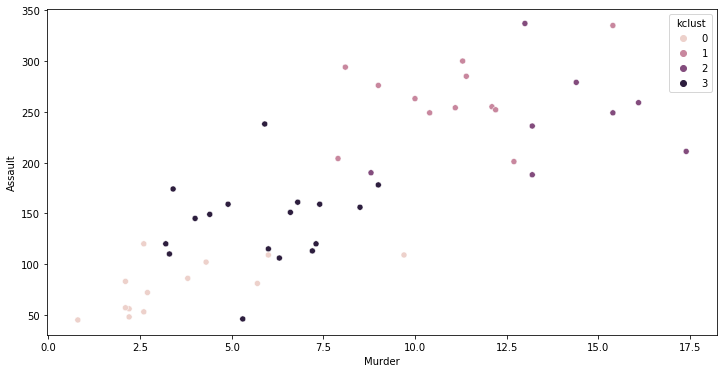

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y =df['Assault'], hue=df['kclust'])